In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
application_train = pd.read_csv('application_train.csv')

In [3]:
# Find correlations with the target and sort
correlations = application_train.corr()['TARGET'].sort_values()


print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645


In [4]:
application_train['DAYS_BIRTH'] = abs(application_train['DAYS_BIRTH'])
application_train['DAYS_BIRTH'].corr(application_train['TARGET'])

-0.07823930830982737

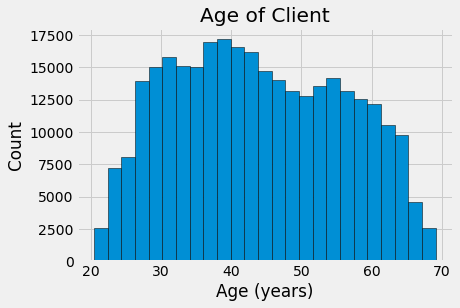

In [5]:
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(application_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

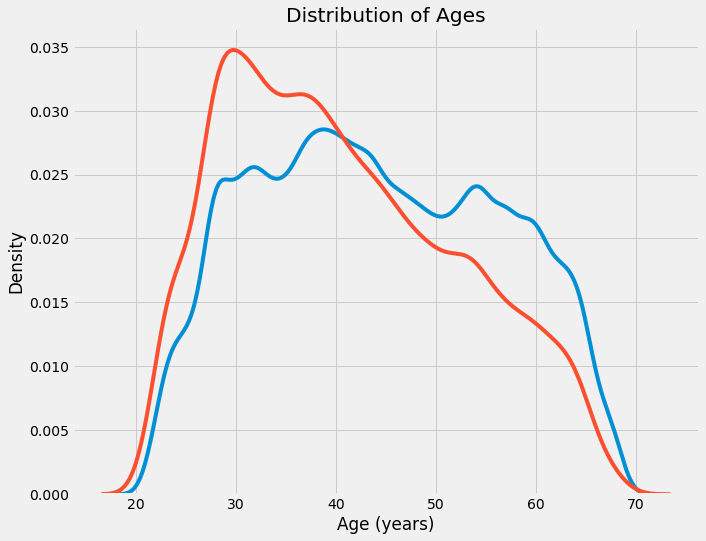

In [6]:
plt.figure(figsize = (10, 8))


sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')


sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

# Mặc dù đây không phải là significant correlation (hệ số tương quan -0,07), nhưng biến này có thể sẽ hữu ích trong mô hình học máy vì nó ảnh hưởng đến TARGET.

In [7]:
age_data = application_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

/var/folders/sh/k0sxj_8d47153mj1tws7b_7h0000gn/T/ipykernel_27223/795581291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
/var/folders/sh/k0sxj_8d47153mj1tws7b_7h0000gn/T/ipykernel_27223/795581291.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [8]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


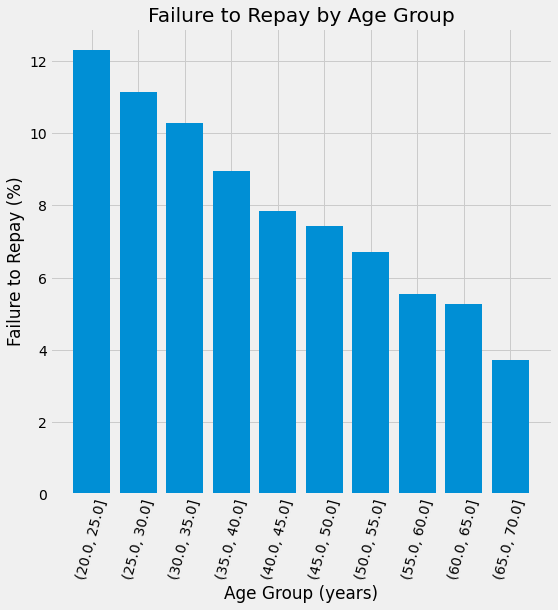

In [9]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

# Có thể thấy rõ ở những người trẻ thường không có khả năng trả được nợ nên cần phải để ý những trường hợp người trẻ đi vay độ tuổi từ 20 đến 30
# LÀ MỘT FEATURE QUAN TRỌNG

In [10]:
def stack_plot(data, xtick, col2='TARGET', col3='total'):
    ind = np.arange(data.shape[0])
    
    if len(data[xtick].unique())<5:
        plt.figure(figsize=(5,5))
    elif len(data[xtick].unique())>5 & len(data[xtick].unique())<10:
        plt.figure(figsize=(7,7))
    else:
        plt.figure(figsize=(15,15))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Loans')
    plt.title('Number of loans aproved vs rejected')
    plt.xticks(ticks=ind,rotation=90,labels= list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('capable', 'not capable'))
    plt.show()
    
    
def univariate_barplots(data, col1, col2='TARGET', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(train_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(train_data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(train_data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Defaulter')]

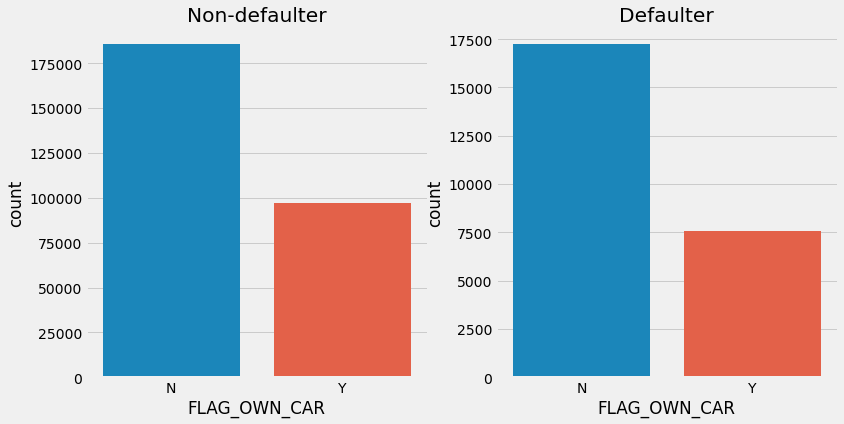

In [13]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.countplot(application_train[application_train["TARGET"] == 0]['FLAG_OWN_CAR'], ax= ax[0]).set(title = "Non-defaulter")
sns.countplot(application_train[application_train["TARGET"] == 1]['FLAG_OWN_CAR'], ax= ax[1]).set(title = "Defaulter")

# Most of the applicants for loans do not own a car. However, there is not much difference in the loan repayment status for the customer based on this information (8.5% and 7.2% respectively). We can conclude that this feature is not very useful => DROP


In [17]:
def defaulter_percentage_count_per_cat(df, col):
    summary = []
    for cat in df[col].unique():
        default_count = df[(df[col] == cat) & (df.TARGET == 1)].shape[0]
        total_count = df[df[col] == cat].shape[0]
        summary.append([cat ,default_count * 100 / total_count])

    report_df = pd.DataFrame(summary)
    report_df.columns = ["Categories", "Percentage_Of_Default"]
    return report_df.sort_values(by='Percentage_Of_Default', ascending=False)

In [18]:
defaulter_percentage_count_per_cat(application_train, 'FLAG_OWN_REALTY')

,Categories,Percentage_Of_Default
1,N,8.324929
0,Y,7.961577


[Text(0.5, 1.0, 'Defaulter')]

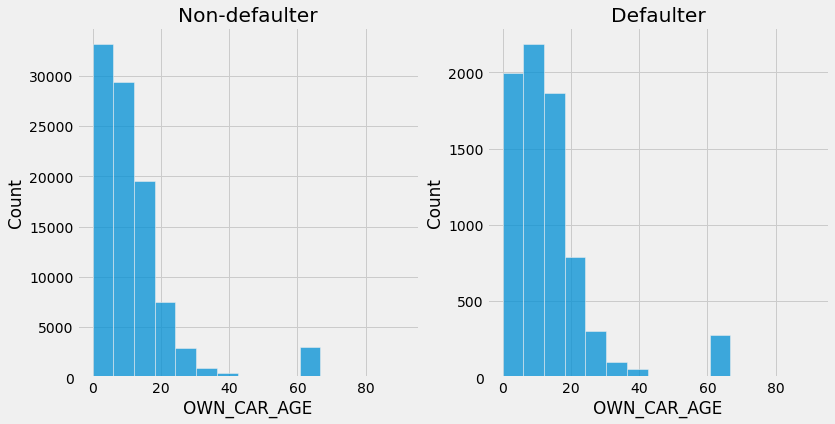

In [19]:
fig, ax = plt.subplots(1,2, figsize= (12,6))
sns.histplot(application_train[application_train["TARGET"] == 0]['OWN_CAR_AGE'], bins= 15, ax= ax[0]).set(title = "Non-defaulter")
sns.histplot(application_train[application_train["TARGET"] == 1]['OWN_CAR_AGE'], bins= 15, ax= ax[1]).set(title = "Defaulter")

# Most of the applicants for loans own a flat/house, which is a little surprising. However, again, there is not much difference in the loan repayment status for the customer based on this information (7.9% and 8.3% respectively). We can conclude that this feature is not very useful.

Text(0.89, 109000, '105059')

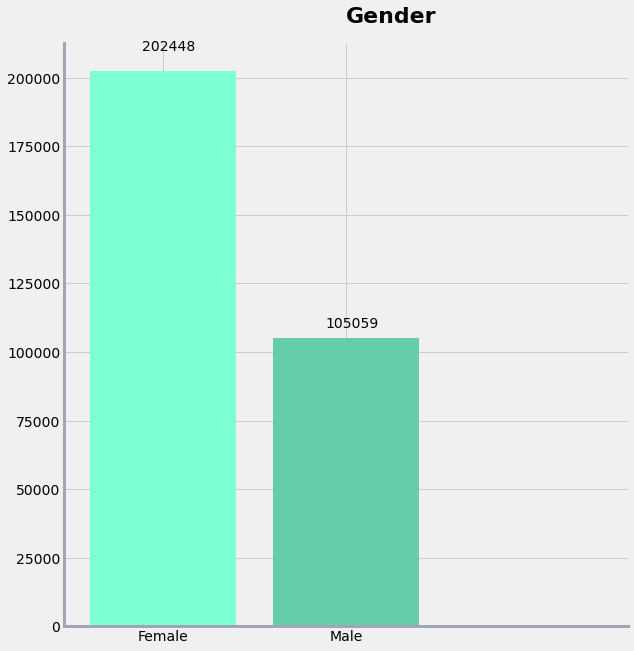

In [20]:
a = application_train["CODE_GENDER"].value_counts()
df = pd.DataFrame(a).reset_index()
df
fig,ax0 = plt.subplots(figsize = (9,10))
ax0.bar(df.index,df.CODE_GENDER,color = ['#7FFFD4', '#66CDAA','blue'])
x= ["Female", 'Male' ]
plt.xticks([0,1],x)
ax0.spines[['top', "right"]].set_visible(False)
ax0.text(1, 220000, 'Gender', size=22, weight="bold")
ax0.spines[['left', 'bottom']].set_color('#a1a6b3')
ax0.text(-0.115, 210000, '202448', size="14", alpha=1)
ax0.text(0.89,109000, '105059', size="14", alpha=1)


In [22]:
perc_m_and_f = application_train[['CODE_GENDER', 'TARGET']].groupby(['CODE_GENDER'],as_index=False).mean()

Text(0.5, 1.0, 'Percentage of M and F have difficulty repayed on time(%)')

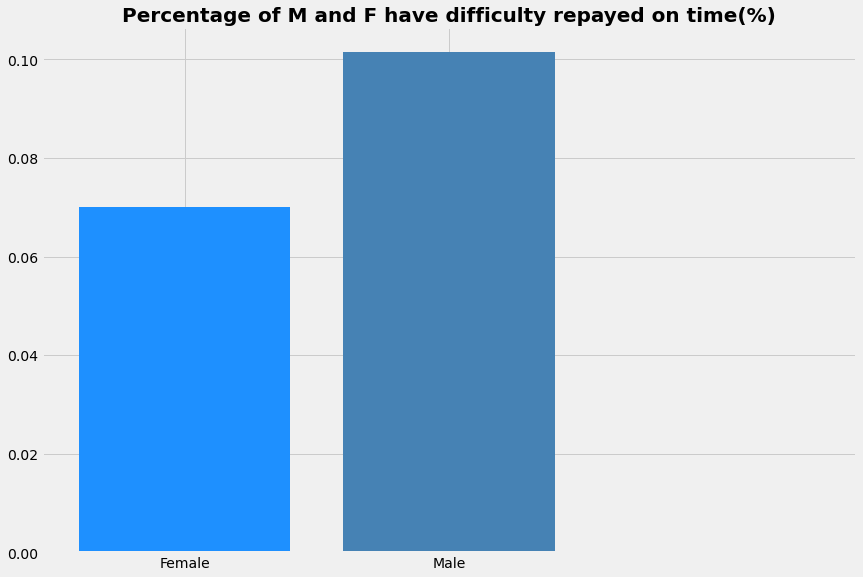

In [23]:
df = pd.DataFrame(perc_m_and_f).reset_index()
df
fig,ax = plt.subplots(figsize = (13,9))
ax.bar(df.index,df.TARGET,color = ["#1E90FF", "#4682B4"])
x= ["Female", 'Male']
plt.xticks([0,1], x)
ax.set_title('Percentage of M and F have difficulty repayed on time(%)', loc='center', size="20",weight = 'bold')

# Mặc dù số lượng Female gần như gấp đôi, nhưng tỉ lệ gặp khó khăn trong việc trả nợ của Male lại là xấp xỉ 10% còn Female là 7% => DROP vì k có gì quan trọng



/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

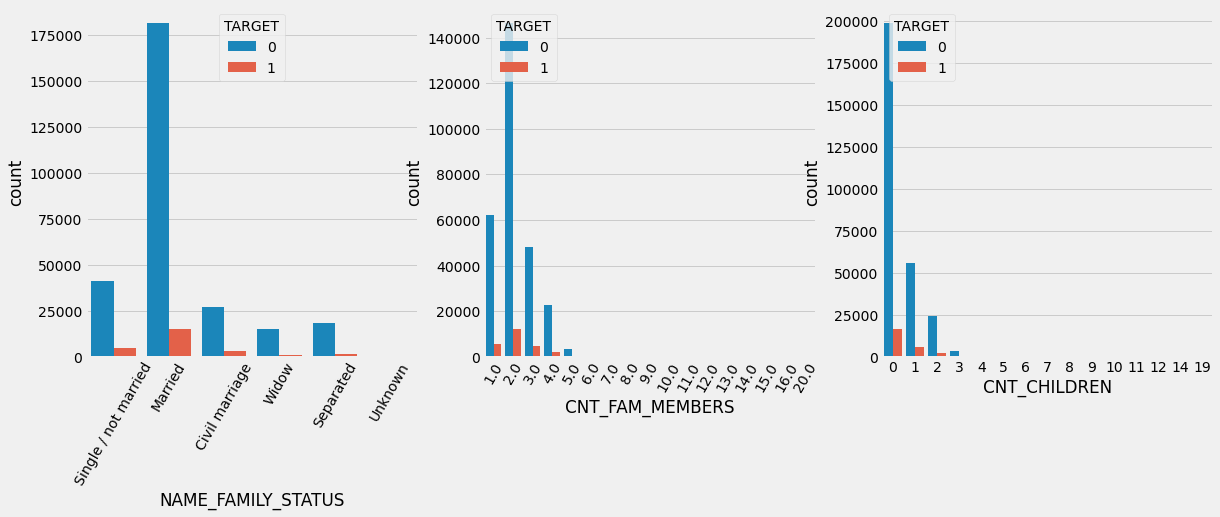

In [30]:
fig, ax = plt.subplots(1,3, figsize= (18,6))
sns.countplot(application_train['NAME_FAMILY_STATUS'], hue=application_train['TARGET'], ax= ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation= 60)
sns.countplot(application_train['CNT_FAM_MEMBERS'], hue=application_train['TARGET'], ax= ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation= 60)
sns.countplot(application_train['CNT_CHILDREN'], hue=application_train['TARGET'], ax= ax[2])

# The applicants having no children take considerably higher number of loans. However, again, there is not much difference in the loan repayment status for the customer based on this information. We can conclude that this feature is not very useful.

In [24]:
ext_data = application_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


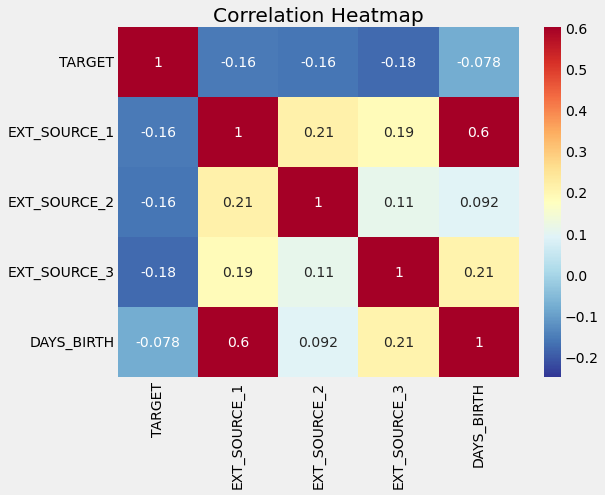

In [25]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

# All three EXT_SOURCE features have negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age. => FEATURE QUAN TRỌNG

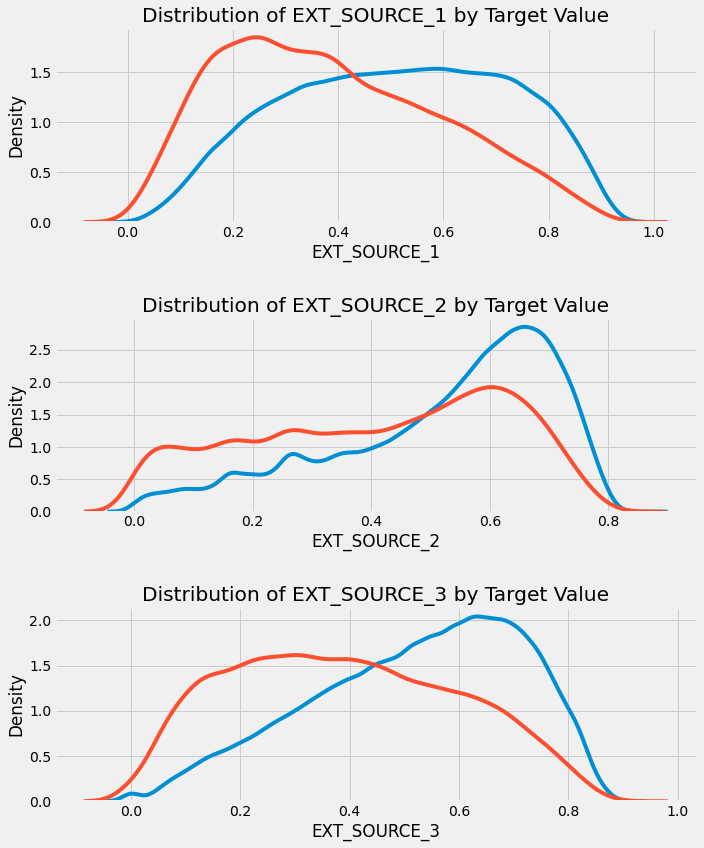

In [28]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

# EXT_SOURCE_3 displays the greatest difference between the values of the target. We can clearly see that this feature has some relationship to the likelihood of an applicant to repay a loan. Tuy nhiên mối tương quan thì k mạnh  nhưng đây vẫn là feature quan trọng
